# Case Study - Summer Olympics

This is the case study proposed in the final chapter of the Data Camp [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas) course. The goal is follow the instructions to practice the concepts presented in the videos and exercises.

The course was conducted by Dhavide Aruliah, Director of Training at Continuum Analytics.

Information about the course provided by Data Camp:

"In this course, you'll learn how to leverage pandas' extremely powerful data manipulation engine to get the most out of your data. It is important to be able to extract, filter, and transform data from DataFrames in order to drill into the data that really matters. The pandas library has many techniques that make this process efficient and intuitive. You will learn how to tidy, rearrange, and restructure your data by pivoting or melting and stacking or unstacking DataFrames. These are all fundamental next steps on the road to becoming a well-rounded Data Scientist, and you will have the chance to apply all the concepts you learn to real-world datasets."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The Olympic medal data for the following case study comes from [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data]). It comprises records of all events held at the Olympic games between 1896 and 2012.

In [3]:
medals = pd.read_csv('./data/Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t', header = 4)

In [4]:
medals.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

## Grouping and aggregating

First, we want to find the total number of medals awarded to the USA per edition.

In [5]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### Using `.value_counts()` for ranking

Now the goal is to determine the top 15 countries ranked by total number of medals. To achieve that we will use the pandas Series method `.value_counts()`. First, we extract the `NOC` column from the DataFrame

In [6]:
medals['NOC']

0        HUN
1        AUT
2        GRE
3        GRE
4        GRE
5        GRE
6        HUN
7        GRE
8        GRE
9        AUT
10       GRE
11       USA
12       HUN
13       USA
14       GER
15       USA
16       GBR
17       FRA
18       AUS
19       USA
20       GBR
21       USA
22       USA
23       GRE
24       AUS
25       HUN
26       GRE
27       USA
28       GRE
29       USA
        ... 
29186    KAZ
29187    UZB
29188    RUS
29189    ARM
29190    KOR
29191    RUS
29192    AZE
29193    KAZ
29194    KGZ
29195    RUS
29196    AZE
29197    BLR
29198    UKR
29199    FRA
29200    KGZ
29201    FRA
29202    BUL
29203    GEO
29204    CHN
29205    TUR
29206    ITA
29207    HUN
29208    KAZ
29209    USA
29210    RUS
29211    GER
29212    LTU
29213    ARM
29214    CUB
29215    RUS
Name: NOC, dtype: object

Notice the this Series has repeated entries for every medal a country has won in any edition of the Olympics. To get the ranking, we just apply `.value_counts()`.  

In [7]:
medals['NOC'].value_counts().head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

### Using `.pivot_table()` to count medals by type

Rather than ranking countries by total medals won and showing that list, we may want to see a bit more detail. WE can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In [8]:
medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count').head(15)

Medal  Bronze   Gold  Silver
NOC                         
AFG       1.0    NaN     NaN
AHO       NaN    NaN     1.0
ALG       8.0    4.0     2.0
ANZ       5.0   20.0     4.0
ARG      88.0   68.0    83.0
ARM       7.0    1.0     1.0
AUS     413.0  293.0   369.0
AUT      44.0   21.0    81.0
AZE       9.0    4.0     3.0
BAH       5.0    9.0     9.0
BAR       1.0    NaN     NaN
BDI       NaN    1.0     NaN
BEL     150.0   91.0   167.0
BER       1.0    NaN     NaN
BLR      53.0   14.0    25.0

In [9]:
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')
counted.head(15)

Medal  Bronze   Gold  Silver  totals
NOC                                 
AFG       1.0    NaN     NaN     1.0
AHO       NaN    NaN     1.0     1.0
ALG       8.0    4.0     2.0    14.0
ANZ       5.0   20.0     4.0    29.0
ARG      88.0   68.0    83.0   239.0
ARM       7.0    1.0     1.0     9.0
AUS     413.0  293.0   369.0  1075.0
AUT      44.0   21.0    81.0   146.0
AZE       9.0    4.0     3.0    16.0
BAH       5.0    9.0     9.0    23.0
BAR       1.0    NaN     NaN     1.0
BDI       NaN    1.0     NaN     1.0
BEL     150.0   91.0   167.0   408.0
BER       1.0    NaN     NaN     1.0
BLR      53.0   14.0    25.0    92.0

In [10]:
# Ordering to get a ranking of the total medals
counted = counted.sort_values('totals', ascending=False)
counted.head(15)

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0

## Understanding the column labels

### Applying `.drop_duplicates()`

What could be the difference between the `'Event_gender'` and `'Gender'` columns? We should be able to evaluate our guess by looking at the unique values of the pairs `(Event_gender, Gender)` in the data. In particular, we should not see something like `(Event_gender='M', Gender='Women')`.

In [11]:
# We first selec the two columns.

ev_gen = medals[['Event_gender', 'Gender']]
ev_gen.head(15)

Event_gender Gender
0             M    Men
1             M    Men
2             M    Men
3             M    Men
4             M    Men
5             M    Men
6             M    Men
7             M    Men
8             M    Men
9             M    Men
10            M    Men
11            M    Men
12            M    Men
13            M    Men
14            M    Men

In [12]:
# We can inspect the pairs frequency of each one of them. Note there are some undesired pairs.

ev_gen.drop_duplicates()

Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men

### Finding possible errors with `.groupby()`

We will now use `.groupby()` to continue our exploration. We will see that there is only one suspicious row: This is likely a data error.

In [13]:
medals.groupby(['Event_gender', 'Gender']).count()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

### Locating suspicious data

We will now inspect the suspect record by locating the offending row.

We will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as we can confirm with a web search.


In [14]:
medals[(medals.Event_gender == 'W') & (medals.Gender == 'Men') ]

City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze

## Constructing alternative country rankings

### Using `.nunique()` to rank by distinct sports

We may want to know which countries won medals in the most distinct sports. The `.nunique()` method is the principal aggregation here. Given a categorical Series `S`, `S.nunique()` returns the number of distinct categories.

In [15]:
Nsports = medals.groupby('NOC')['Sport'].nunique()
Nsports.head(15)

NOC
AFG     1
AHO     1
ALG     3
ANZ     5
ARG    17
ARM     3
AUS    22
AUT    16
AZE     4
BAH     2
BAR     1
BDI     1
BEL    18
BER     1
BLR    11
Name: Sport, dtype: int64

In [16]:
Nsports = Nsports.sort_values(ascending=False)
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

### Counting USA vs. USSR Cold War Olympic Sports

The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Our goal now is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding. There is an additional filtering stage beforehand in which we reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame are `'USA'` and `'URS'`.

In [17]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war

during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988) 
during_cold_war.head(15)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: Edition, dtype: bool

In [18]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs

is_usa_urs = medals.NOC.isin(['USA', 'URS'])
is_usa_urs.head(15)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13     True
14    False
Name: NOC, dtype: bool

In [19]:
# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
# Is this DataFrame the two boolean conditions are true

cold_war_medals = medals.loc[ during_cold_war & is_usa_urs  ]
cold_war_medals

City  Edition          Sport       Discipline  \
8019   Helsinki     1952       Aquatics           Diving   
8021   Helsinki     1952       Aquatics           Diving   
8022   Helsinki     1952       Aquatics           Diving   
8023   Helsinki     1952       Aquatics           Diving   
8024   Helsinki     1952       Aquatics           Diving   
8025   Helsinki     1952       Aquatics           Diving   
8026   Helsinki     1952       Aquatics           Diving   
8027   Helsinki     1952       Aquatics           Diving   
8028   Helsinki     1952       Aquatics           Diving   
8030   Helsinki     1952       Aquatics         Swimming   
8031   Helsinki     1952       Aquatics         Swimming   
8037   Helsinki     1952       Aquatics         Swimming   
8043   Helsinki     1952       Aquatics         Swimming   
8047   Helsinki     1952       Aquatics         Swimming   
8053   Helsinki     1952       Aquatics         Swimming   
8054   Helsinki     1952       Aquatics         Swimming   
8057   Helsinki     1952       Aquatics         Swimming   
8058   Helsinki     1952       Aquatics         Swimming   
8059   Helsinki     1952       Aquatics         Swimming   
8060   Helsinki     1952       Aquatics         Swimming   
8073   Helsinki     1952       Aquatics         Swimming   
8074   Helsinki     1952       Aquatics         Swimming   
8075   Helsinki     1952       Aquatics         Swimming   
8076   Helsinki     1952       Aquatics         Swimming   
8114   Helsinki     1952      Athletics        Athletics   
8117   Helsinki     1952      Athletics        Athletics   
8121   Helsinki     1952      Athletics        Athletics   
8126   Helsinki     1952      Athletics        Athletics   
8127   Helsinki     1952      Athletics        Athletics   
8128   Helsinki     1952      Athletics        Athletics   
...         ...      ...            ...              ...   
19494     Seoul     1988     Volleyball       Volleyball   
19511     Seoul     1988  Weightlifting    Weightlifting   
19514     Seoul     1988  Weightlifting    Weightlifting   
19517     Seoul     1988  Weightlifting    Weightlifting   
19524     Seoul     1988  Weightlifting    Weightlifting   
19529     Seoul     1988  Weightlifting    Weightlifting   
19532     Seoul     1988  Weightlifting    Weightlifting   
19533     Seoul     1988  Weightlifting    Weightlifting   
19535     Seoul     1988  Weightlifting    Weightlifting   
19537     Seoul     1988      Wrestling  Wrestling Free.   
19541     Seoul     1988      Wrestling  Wrestling Free.   
19542     Seoul     1988      Wrestling  Wrestling Free.   
19543     Seoul     1988      Wrestling  Wrestling Free.   
19547     Seoul     1988      Wrestling  Wrestling Free.   
19550     Seoul     1988      Wrestling  Wrestling Free.   
19551     Seoul     1988      Wrestling  Wrestling Free.   
19552     Seoul     1988      Wrestling  Wrestling Free.   
19553     Seoul     1988      Wrestling  Wrestling Free.   
19556     Seoul     1988      Wrestling  Wrestling Free.   
19557     Seoul     1988      Wrestling  Wrestling Free.   
19562     Seoul     1988      Wrestling  Wrestling Free.   
19564     Seoul     1988      Wrestling  Wrestling Free.   
19566     Seoul     1988      Wrestling  Wrestling Free.   
19571     Seoul     1988      Wrestling  Wrestling Gre-R   
19580     Seoul     1988      Wrestling  Wrestling Gre-R   
19583     Seoul     1988      Wrestling  Wrestling Gre-R   
19587     Seoul     1988      Wrestling  Wrestling Gre-R   
19589     Seoul     1988      Wrestling  Wrestling Gre-R   
19591     Seoul     1988      Wrestling  Wrestling Gre-R   
19594     Seoul     1988      Wrestling  Wrestling Gre-R   

                          Athlete  NOC Gender  \
8019                  LEE, Samuel  USA    Men   
8021   STOVER-IRWIN, Juno Roslays  USA  Women   
8022          MCCORMICK, Patricia  USA  Women   
8023       MYERS-POPE, Paula Jean  USA  Women   
8024      CLOTWORTHY, Robert Lynn  USA    Men

In [20]:
cold_war_medals.groupby('NOC')['Sport'].nunique().sort_values(ascending=False)

NOC
URS    21
USA    20
Name: Sport, dtype: int64

As we can see, the number of sports which the USSR have won medals is greater than the USA number between 1952 and 1988.

Now we want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period. First, we will need a pivot table with years (`'Edition'`) on the index and countries (`'NOC'`) on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, we expect a `NaN` in that entry of the pivot table.

In [21]:
medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

NOC      AFG  AHO  ALG   ANZ   ARG  ARM    AUS   AUT  AZE  BAH  ...     URS  \
Edition                                                         ...           
1896     NaN  NaN  NaN   NaN   NaN  NaN    2.0   5.0  NaN  NaN  ...     NaN   
1900     NaN  NaN  NaN   NaN   NaN  NaN    5.0   6.0  NaN  NaN  ...     NaN   
1904     NaN  NaN  NaN   NaN   NaN  NaN    NaN   1.0  NaN  NaN  ...     NaN   
1908     NaN  NaN  NaN  19.0   NaN  NaN    NaN   1.0  NaN  NaN  ...     NaN   
1912     NaN  NaN  NaN  10.0   NaN  NaN    NaN  14.0  NaN  NaN  ...     NaN   
1920     NaN  NaN  NaN   NaN   NaN  NaN    6.0   NaN  NaN  NaN  ...     NaN   
1924     NaN  NaN  NaN   NaN  11.0  NaN   10.0   4.0  NaN  NaN  ...     NaN   
1928     NaN  NaN  NaN   NaN  32.0  NaN    4.0   4.0  NaN  NaN  ...     NaN   
1932     NaN  NaN  NaN   NaN   4.0  NaN    5.0   5.0  NaN  NaN  ...     NaN   
1936     NaN  NaN  NaN   NaN  11.0  NaN    1.0  50.0  NaN  NaN  ...     NaN   
1948     NaN  NaN  NaN   NaN  12.0  NaN   16.0   4.0  NaN  NaN  ...     NaN   
1952     NaN  NaN  NaN   NaN   6.0  NaN   20.0   3.0  NaN  NaN  ...   117.0   
1956     NaN  NaN  NaN   NaN   2.0  NaN   61.0   4.0  NaN  2.0  ...   169.0   
1960     NaN  NaN  NaN   NaN   4.0  NaN   36.0   3.0  NaN  NaN  ...   169.0   
1964     NaN  NaN  NaN   NaN   1.0  NaN   42.0   NaN  NaN  2.0  ...   174.0   
1968     NaN  NaN  NaN   NaN   2.0  NaN   49.0   5.0  NaN  NaN  ...   188.0   
1972     NaN  NaN  NaN   NaN   1.0  NaN   20.0   3.0  NaN  NaN  ...   211.0   
1976     NaN  NaN  NaN   NaN   NaN  NaN   24.0   1.0  NaN  NaN  ...   285.0   
1980     NaN  NaN  NaN   NaN   NaN  NaN   12.0   5.0  NaN  NaN  ...   442.0   
1984     NaN  NaN  2.0   NaN   NaN  NaN   50.0   3.0  NaN  NaN  ...     NaN   
1988     NaN  1.0  NaN   NaN  13.0  NaN   34.0   1.0  NaN  NaN  ...   294.0   
1992     NaN  NaN  2.0   NaN   2.0  NaN   57.0   6.0  NaN  1.0  ...     NaN   
1996     NaN  NaN  3.0   NaN  20.0  2.0  132.0   3.0  1.0  5.0  ...     NaN   
2000     NaN  NaN  5.0   NaN  20.0  1.0  183.0   4.0  3.0  6.0  ...     NaN   
2004     NaN  NaN  NaN   NaN  47.0  NaN  157.0   8.0  5.0  2.0  ...     NaN   
2008     1.0  NaN  2.0   NaN  51.0  6.0  149.0   3.0  7.0  5.0  ...     NaN   

NOC       URU    USA  UZB  VEN  VIE   YUG  ZAM   ZIM   ZZX  
Edition                                                     
1896      NaN   20.0  NaN  NaN  NaN   NaN  NaN   NaN   6.0  
1900      NaN   55.0  NaN  NaN  NaN   NaN  NaN   NaN  34.0  
1904      NaN  394.0  NaN  NaN  NaN   NaN  NaN   NaN   8.0  
1908      NaN   63.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1912      NaN  101.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1920      NaN  193.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1924     22.0  198.0  NaN  NaN  NaN   2.0  NaN   NaN   NaN  
1928     22.0   84.0  NaN  NaN  NaN  12.0  NaN   NaN   NaN  
1932      1.0  181.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1936      NaN   92.0  NaN  NaN  NaN   1.0  NaN   NaN   NaN  
1948      3.0  148.0  NaN  NaN  NaN  16.0  NaN   NaN   NaN  
1952     14.0  130.0  NaN  1.0  NaN  24.0  NaN   NaN   NaN  
1956     12.0  118.0  NaN  NaN  NaN  23.0  NaN   NaN   NaN  
1960      NaN  112.0  NaN  1.0  NaN  17.0  NaN   NaN   NaN  
1964      1.0  150.0  NaN  NaN  NaN  15.0  NaN   NaN   NaN  
1968      NaN  149.0  NaN  1.0  NaN  29.0  NaN   NaN   NaN  
1972      NaN  155.0  NaN  NaN  NaN  18.0  NaN   NaN   NaN  
1976      NaN  155.0  NaN  1.0  NaN  19.0  NaN   NaN   NaN  
1980      NaN    NaN  NaN  1.0  NaN  57.0  NaN  16.0   NaN  
1984      NaN  333.0  NaN  3.0  NaN  87.0  1.0   NaN   NaN  
1988      NaN  193.0  NaN  NaN  NaN  63.0  NaN   NaN   NaN  
1992      NaN  224.0  NaN  NaN  NaN   NaN  NaN   NaN   NaN  
1996      NaN  260.0  2.0  NaN  NaN  26.0  1.0   NaN   NaN  
2000      1.0  248.0  4.0  NaN  1.0  26.0  NaN   NaN   NaN  
2004      NaN  264.0  5.0  2.0  NaN   NaN  NaN   3.0   NaN  
2008      NaN  315.0  6.0  1.0  1.0   NaN  NaN   4.0   NaN  

[26 rows x 138 columns]

In [22]:
# Slicing the Cold War period and subsetting the USA and URS columns.

medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')
medals_won_by_country.loc[ 1952:1988, ['USA', 'URS'] ]

NOC        USA    URS
Edition              
1952     130.0  117.0
1956     118.0  169.0
1960     112.0  169.0
1964     150.0  174.0
1968     149.0  188.0
1972     155.0  211.0
1976     155.0  285.0
1980       NaN  442.0
1984     333.0    NaN
1988     193.0  294.0

During the Cold War, which of them has won more medals per edition?

We will need to make a Series from the slice above of the pivot table that tells which country won the most medals in that edition using `.idxmax(axis='columns')`. If `.max()` returns the maximum value of Series or 1D array, `.idxmax()` returns the index of the maximizing element. The argument `axis=columns` or `axis=1` is required because, by default, this aggregation would be done along columns for a DataFrame.

In [23]:
cold_war_usa_usr_medals = medals_won_by_country.loc[ 1952:1988, ['USA', 'URS'] ]
cold_war_usa_usr_medals.idxmax(axis='columns')

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [24]:
# We can count the number of occurences.

cold_war_usa_usr_medals.idxmax(axis='columns').value_counts()

URS    8
USA    2
dtype: int64

Just to visualization, we show the result of the `.idxmax()` without the argument `axis='columns`. We would have got the edition in which each country won more medals.

In [25]:
# Just toWithout the argument, we would get the edition in which each country won more medals (index).

cold_war_usa_usr_medals.idxmax()

NOC
USA    1984
URS    1980
dtype: int64

## Reshaping DataFrames for visualization

### Visualizing USA Medal Counts by Edition: Line Plot

Now we are going to visualize the medal counts by `'Edition'` for the USA. The DataFrame has been pre-loaded for you as medals.

In [26]:
usa = medals[(medals.NOC == 'USA') ]
usa.head(15)

City  Edition      Sport Discipline               Athlete  NOC Gender  \
11  Athens     1896  Athletics  Athletics         LANE, Francis  USA    Men   
13  Athens     1896  Athletics  Athletics         BURKE, Thomas  USA    Men   
15  Athens     1896  Athletics  Athletics        CURTIS, Thomas  USA    Men   
19  Athens     1896  Athletics  Athletics         BLAKE, Arthur  USA    Men   
21  Athens     1896  Athletics  Athletics         BURKE, Thomas  USA    Men   
22  Athens     1896  Athletics  Athletics      JAMISON, Herbert  USA    Men   
27  Athens     1896  Athletics  Athletics       GARRETT, Robert  USA    Men   
29  Athens     1896  Athletics  Athletics         CLARK, Ellery  USA    Men   
30  Athens     1896  Athletics  Athletics       CONNOLLY, James  USA    Men   
31  Athens     1896  Athletics  Athletics       GARRETT, Robert  USA    Men   
32  Athens     1896  Athletics  Athletics       CONNOLLY, James  USA    Men   
33  Athens     1896  Athletics  Athletics         CLARK, Ellery  USA    Men   
34  Athens     1896  Athletics  Athletics       GARRETT, Robert  USA    Men   
40  Athens     1896  Athletics  Athletics  HOYT, William Welles  USA    Men   
41  Athens     1896  Athletics  Athletics         TYLER, Albert  USA    Men   

           Event Event_gender   Medal  
11          100m            M  Bronze  
13          100m            M    Gold  
15  110m hurdles            M    Gold  
19         1500m            M  Silver  
21          400m            M    Gold  
22          400m            M  Silver  
27  discus throw            M    Gold  
29     high jump            M    Gold  
30     high jump            M  Silver  
31     high jump            M  Silver  
32     long jump            M  Bronze  
33     long jump            M    Gold  
34     long jump            M  Silver  
40    pole vault            M    Gold  
41    pole vault            M  Silver

In [27]:
usa.groupby(['Edition', 'Medal'])['Athlete'].count()

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
         Gold       34
         Silver     14
1912     Bronze     31
         Gold       45
         Silver     25
1920     Bronze     38
         Gold      110
         Silver     45
1924     Bronze     51
         Gold      110
         Silver     37
1928     Bronze     17
         Gold       43
         Silver     24
1932     Bronze     59
         Gold       78
         Silver     44
1936     Bronze     15
         Gold       51
         Silver     26
                  ... 
1968     Bronze     35
         Gold       83
         Silver     31
1972     Bronze     43
         Gold       53
         Silver     59
1976     Bronze     36
         Gold       63
         Silver     56
1984     Bronze     50
         Gold      168
         Silver   

Reshaping the DataFrame using `.unstack()`.

In [28]:
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year.unstack(level='Medal')

Medal    Bronze  Gold  Silver
Edition                      
1896          2    11       7
1900         14    27      14
1904        111   146     137
1908         15    34      14
1912         31    45      25
1920         38   110      45
1924         51   110      37
1928         17    43      24
1932         59    78      44
1936         15    51      26
1948         35    83      30
1952         28    79      23
1956         20    61      37
1960         21    68      23
1964         36    78      36
1968         35    83      31
1972         43    53      59
1976         36    63      56
1984         50   168     115
1988         52    77      64
1992         85    89      50
1996         52   160      48
2000         52   130      66
2004         73   116      75
2008         81   125     109

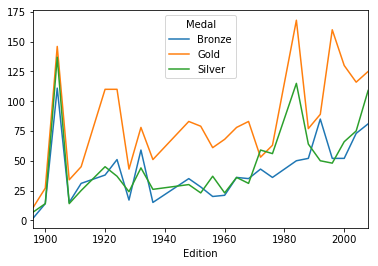

In [29]:
usa_medals_by_year.unstack(level='Medal').plot()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot

We still want to visualize the medal counts by `'Edition'` for the USA. This time, we will use an area plot to see the breakdown better.

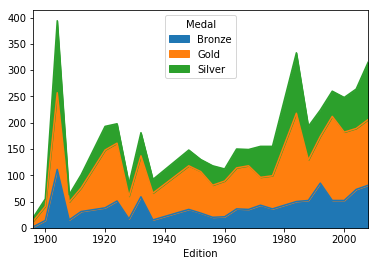

In [30]:
usa_medals_by_year.unstack(level='Medal').plot.area()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

Notice that the medals are ordered according to a lexicographic (dictionary) ordering: `Bronze` < `Gold` < `Silver`. However, we would prefer an ordering consistent with the Olympic rules: `Bronze` < `Silver` < `Gold`.

We can achieve this using `Categorical` types. After redefining the `'Medal'` column of the DataFrame `medals`, we will repeat the area plot from the previous to see the new ordering.

In [31]:
# Redefining 'Medal' as an ordered categorical variable.

medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

In [32]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


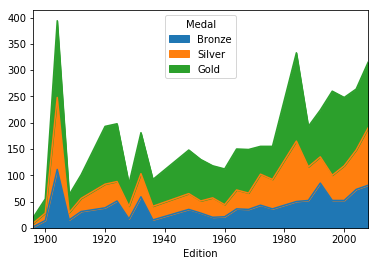

In [33]:
usa = medals[ (medals.NOC == 'USA') ]
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

usa_medals_by_year.unstack(level='Medal').plot.area()
plt.show()